<a href="https://colab.research.google.com/github/ayushkumar90/Wild-AI/blob/main/Wild_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path_root = r'/content/drive/MyDrive/ProbeSet'


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 22931 images belonging to 2 classes.


In [9]:
batches.class_indices

{'Elephant': 0, 'NotElephant': 1}

In [10]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
imgs, labels = next(batches)

In [12]:
imgs.shape

(10000, 64, 64, 3)

In [13]:
labels.shape

(10000, 2)

In [14]:

def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

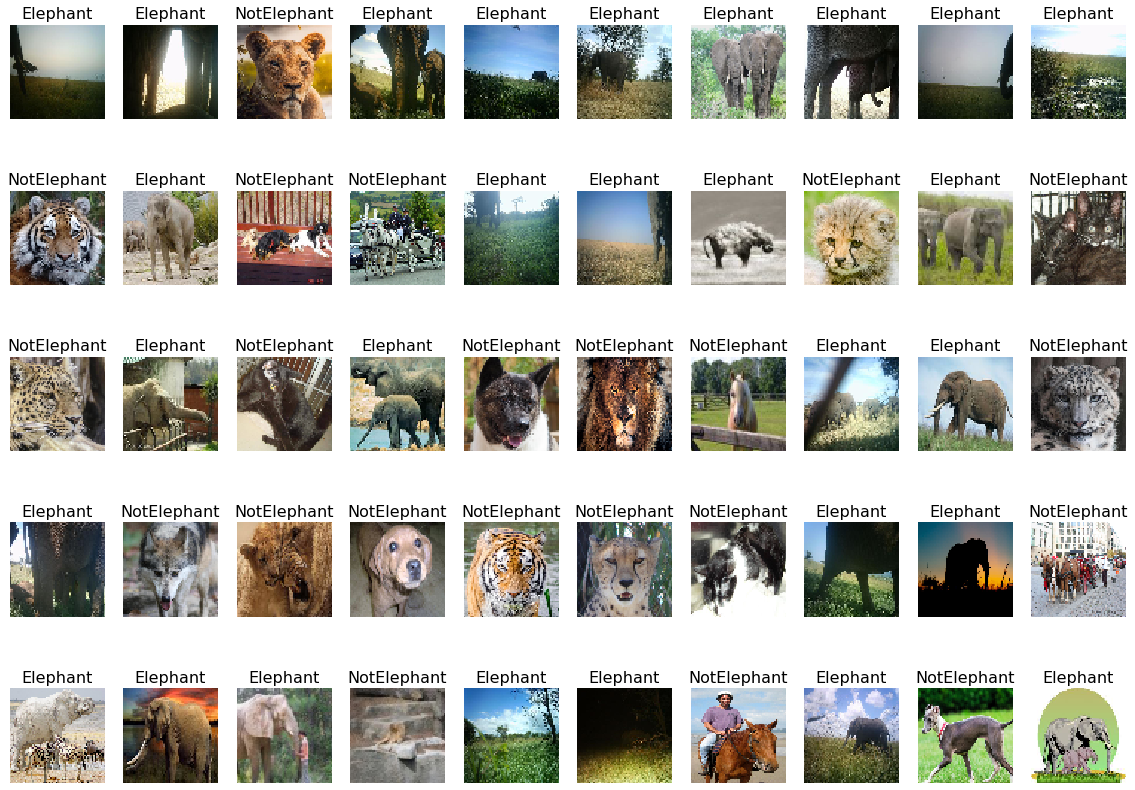

In [15]:
plots(imgs, titles = labels)

In [16]:
classes = batches.class_indices.keys()
classes

dict_keys(['Elephant', 'NotElephant'])

In [17]:
perc = (sum(labels)/labels.shape[0])*100

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3,random_state=1)

In [19]:
X_train.shape

(7000, 64, 64, 3)

In [20]:
X_test.shape

(3000, 64, 64, 3)

In [21]:
y_train.shape

(7000, 2)

In [22]:
y_test.shape

(3000, 2)

In [23]:
from tensorflow.keras.layers import BatchNormalization

In [24]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization

In [25]:
num_classes = 2

In [26]:
import tensorflow as tf

In [27]:
def Wild_AI():
    Wild_AI = Sequential()
    Wild_AI.add(Conv2D(16, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))
    Wild_AI.add(MaxPooling2D(pool_size=(2, 2)))
    Wild_AI.add(Conv2D(32, (3, 3), activation='relu'))
    Wild_AI.add(MaxPooling2D(pool_size=(2, 2)))
    Wild_AI.add(Conv2D(64, (3, 3), activation='relu'))
    Wild_AI.add(MaxPooling2D(pool_size=(2, 2)))
    Wild_AI.add(Dropout(0.25))
    Wild_AI.add(Flatten())
    Wild_AI.add(Dense(128, activation='relu'))
    Wild_AI.add(Dense(2,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))
    Wild_AI.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    return Wild_AI



In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [29]:
Wild_AI = Wild_AI()

In [30]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                               mode='max', 
                               patience = 5 ,
                               restore_best_weights=True)


mc = ModelCheckpoint('WildAI2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
mode=Wild_AI.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs = 100, 
                verbose = 2,
                batch_size = 64,
                callbacks = [early_stop,mc]
            )

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.82133, saving model to WildAI2.h5
110/110 - 42s - loss: 0.5193 - accuracy: 0.7716 - val_loss: 0.4237 - val_accuracy: 0.8213 - 42s/epoch - 382ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.82133 to 0.84933, saving model to WildAI2.h5
110/110 - 26s - loss: 0.4090 - accuracy: 0.8317 - val_loss: 0.3522 - val_accuracy: 0.8493 - 26s/epoch - 241ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.84933
110/110 - 26s - loss: 0.3605 - accuracy: 0.8459 - val_loss: 0.3798 - val_accuracy: 0.8363 - 26s/epoch - 234ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.84933 to 0.86800, saving model to WildAI2.h5
110/110 - 27s - loss: 0.3217 - accuracy: 0.8667 - val_loss: 0.3060 - val_accuracy: 0.8680 - 27s/epoch - 242ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.86800 to 0.88100, saving model to WildAI2.h5
110/110 - 27s - loss: 0.2881 - accuracy: 0.8814 - val_loss: 0.2839 - val_accuracy: 0.8810 - 27s

In [31]:
y_train.shape

(7000, 2)

In [32]:
y_train_new = np.argmax(y_train, axis=1)

In [33]:
y_train_new

array([0, 0, 0, ..., 1, 0, 1])

In [34]:
scores = Wild_AI.evaluate(X_test, y_test)

94/94 [==============================] - 3s 34ms/step - loss: 0.2377 - accuracy: 0.9040


In [35]:
scores = Wild_AI.evaluate(X_train, y_train)

219/219 [==============================] - 7s 33ms/step - loss: 0.1704 - accuracy: 0.9367


In [36]:
print('CNN accuracy: ', scores[1])

CNN accuracy:  0.9367142915725708


In [37]:
print('CNN loss: ', scores[0])

CNN loss:  0.17039349675178528


In [38]:
import pandas as pd

In [39]:
y_p=Wild_AI.predict(X_test) 
y_pred=np.argmax(y_p,axis=1)

In [40]:
y_test2 = np.argmax(y_test, axis=1)

In [41]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [42]:
c_matrix

array([[1352,  167],
       [ 121, 1360]])

In [44]:
#Model.save('/content/drive/MyDrive/wildAi.h5')


